<a href="https://colab.research.google.com/github/SAMAWELJABALLI/TweetsSentimentAnalysis/blob/main/Random_Forest_Tunisian_Dialect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**THE RANDOM FOREST MODDEL ON TUNISIAN DIALECT**

In [9]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report,roc_curve, auc, accuracy_score
from sklearn import metrics
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from bs4 import BeautifulSoup
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import seaborn as sns
from tqdm import tqdm
import os

# Loading saved vectors 

In [10]:
# loading bow vectors
X_train_bow = pickle.load(open("/content/drive/MyDrive/saved_feats/X_train_bow","rb"))
X_test_bow = pickle.load(open("/content/drive/MyDrive/saved_feats/X_test_bow","rb"))
bow_features = pickle.load(open("/content/drive/MyDrive/saved_feats/bow_features","rb")).tolist()
print('shape of X_train_bow is {}'.format(X_train_bow.shape))
print('shape of X_test_bow is {}'.format(X_test_bow.shape))


#loading tfidf vectors
X_train_tfidf = pickle.load(open("/content/drive/MyDrive/saved_feats/X_train_tfidf","rb"))
X_test_tfidf = pickle.load(open("/content/drive/MyDrive/saved_feats/X_test_tfidf","rb"))
tfidf_features = pickle.load(open("/content/drive/MyDrive/saved_feats/tfidf_features","rb")).tolist()
print('shape of X_train_tfidf is {}'.format(X_train_tfidf.shape))
print('shape of X_test_tfidf is {}'.format(X_test_tfidf.shape))


w2v_words = pickle.load(open("/content/drive/MyDrive/saved_feats/w2v_words","rb")).tolist()
#avgw2v
X_train_avgw2v = pickle.load(open("/content/drive/MyDrive/saved_feats/X_train_avgw2v","rb"))
X_test_avgw2v = pickle.load(open("/content/drive/MyDrive/saved_feats/X_test_avgw2v","rb"))
print('shape of X_train_avgw2v is {}'.format(X_train_avgw2v.shape))
print('shape of X_test_avgw2v is {}'.format(X_test_avgw2v.shape))

'''#tfidf-w2v
X_train_tfw2v = pickle.load(open("/content/drive/MyDrive/saved_feats/X_train_tfw2v","rb"))
X_test_tfw2v = pickle.load(open("/content/drive/MyDrive/saved_feats/X_test_tfw2v","rb"))
print('shape of X_train_tfw2v is {}'.format(X_train_tfw2v.shape))
print('shape of X_test_tfw2v is {}'.format(X_test_tfw2v.shape))

'''
y_train = np.load('/content/drive/MyDrive/saved_feats/y_train.npy',allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/saved_feats/y_test.npy',allow_pickle=True)
print(f'shape of y_train is {y_train.shape}')
print(f'shape of y_test is {y_test.shape}')

shape of X_train_bow is (139367, 144497)
shape of X_test_bow is (59730, 144497)
shape of X_train_tfidf is (139367, 144497)
shape of X_test_tfidf is (59730, 144497)
shape of X_train_avgw2v is (139367, 50)
shape of X_test_avgw2v is (59730, 50)
shape of y_train is (139367,)
shape of y_test is (59730,)


# helper function to plot confusion matrix

In [13]:
# helper function to plot confusion matrix
def plot_confusion_matrixes(model,x_train,y_train,x_test,y_test):
    cm_train = confusion_matrix(y_train,model.predict(x_train))
    cm_test =  confusion_matrix(y_test,model.predict(x_test))
    class_label = ["negative", "positive"]
    df_train = pd.DataFrame(cm_train, index = class_label, columns = class_label)
    df_test = pd.DataFrame(cm_test, index = class_label, columns = class_label)
    f, axes = plt.subplots(1, 2,figsize=(12,4))

    for i in range(2):
      df = df_train if i==0 else df_test
      sns.heatmap(df, annot = True, fmt = "d",ax=axes[i])
      axes[i].set_title(f"Confusion Matrix - {'Train' if i==0 else 'Test'}")
      axes[i].set_xlabel("Predicted Label")
      axes[i].set_ylabel("True Label")
    plt.show()



# **Random Forest**
## Random Forest On BagOfWords Features


Model with best parameters :
 {'max_depth': 30, 'n_estimators': 120}
CPU times: user 48.5 s, sys: 2.49 s, total: 51 s
Wall time: 52min 15s


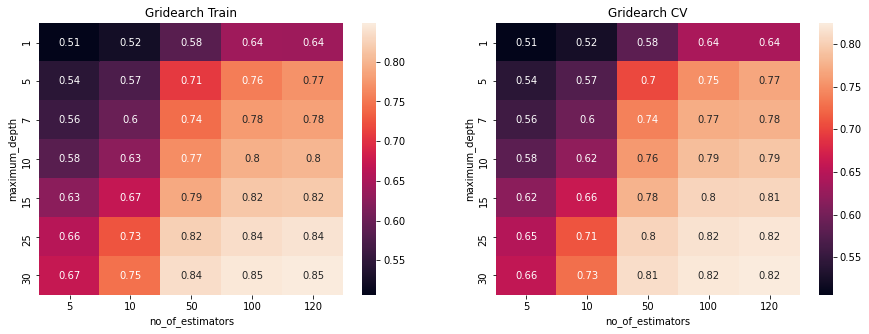

In [6]:
%%time
clf = RandomForestClassifier(n_jobs= -1,class_weight='balanced')
no_of_estimators = [5, 10, 50, 100, 120]
maximumdepth = [1, 5, 7, 10, 15, 25, 30]
parameters = {'n_estimators': no_of_estimators ,'max_depth':maximumdepth}
model = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, n_jobs=-1, scoring='roc_auc',return_train_score=True)
model.fit(X_train_bow,y_train)
print("Model with best parameters :\n",model.best_params_)
train_auc = model.cv_results_['mean_train_score'].reshape(7,5)
cv_auc = model.cv_results_['mean_test_score'].reshape(7,5)

f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
  title = train_auc if i == 0 else cv_auc
  sns.heatmap(title,xticklabels=no_of_estimators,yticklabels=maximumdepth,annot=True,ax=axes[i])
  axes[i].set_title(f"Gridearch {'Train' if i==0 else 'CV'}")
  axes[i].set_xlabel("no_of_estimators")
  axes[i].set_ylabel("maximum_depth")

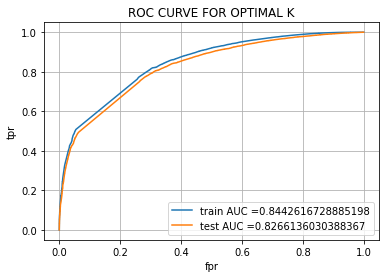

Area under train roc 0.8442616728885198
Area under test roc 0.8266136030388367


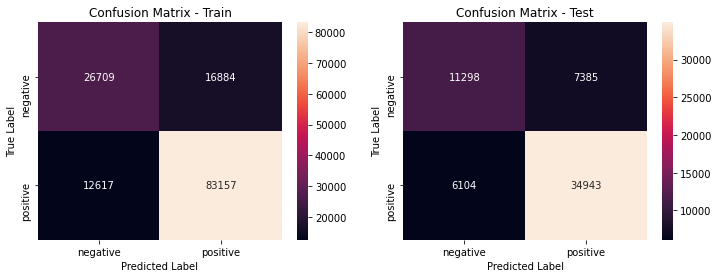


-----classification report on train data on BOW -----

              precision    recall  f1-score   support

           0       0.68      0.61      0.64     43593
           1       0.83      0.87      0.85     95774

    accuracy                           0.79    139367
   macro avg       0.76      0.74      0.75    139367
weighted avg       0.78      0.79      0.79    139367


-----classification report on validation data on BOW -----

              precision    recall  f1-score   support

           0       0.65      0.60      0.63     18683
           1       0.83      0.85      0.84     41047

    accuracy                           0.77     59730
   macro avg       0.74      0.73      0.73     59730
weighted avg       0.77      0.77      0.77     59730



In [14]:
best_est = RandomForestClassifier(**model.best_params_,class_weight='balanced')
best_est = best_est.fit(X_train_bow,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, best_est.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, best_est.predict_proba(X_test_bow)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))
plot_confusion_matrixes(best_est,X_train_bow,y_train,X_test_bow,y_test)

#classification report on train data
print('\n-----classification report on train data on BOW -----\n')
print(classification_report(y_train, best_est.predict(X_train_bow)))

#classification report on validation data
print('\n-----classification report on validation data on BOW -----\n')
print(classification_report(y_test, best_est.predict(X_test_bow)))

# **Feature importance**

Top 20 features are: 
            coef
ربي    0.037260
bravo  0.020423
fi     0.016948
pas    0.016047
rabi   0.014501
mala   0.013050
لا     0.012269
ne     0.011488
bonne  0.011310
ki     0.010100
el     0.009910
très   0.009185
الله   0.009038
bech   0.008993
merci  0.008369
ti     0.008086
bon    0.007525
fih    0.007516
bien   0.007168
ممتاز  0.007074


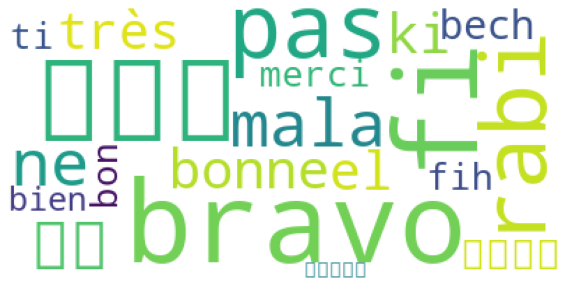

In [15]:
from wordcloud import WordCloud
dataf = best_est.feature_importances_
features = bow_features
dataf = pd.DataFrame(dataf,columns=['coef'],index=features)
top = dataf.sort_values(by='coef',ascending=False).head(20)
print('Top 20 features are: \n {}'.format(top))
top['words'] = top.index
top.reset_index(drop=True)
sent = top.words.str.cat(sep=' ')
#word cloud representation
wordcloud = WordCloud(background_color='white').generate(sent)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Random Forest On TFIDF Features


Model with best parameters :
 {'max_depth': 30, 'n_estimators': 120}
CPU times: user 41.1 s, sys: 1.12 s, total: 42.3 s
Wall time: 25min 18s


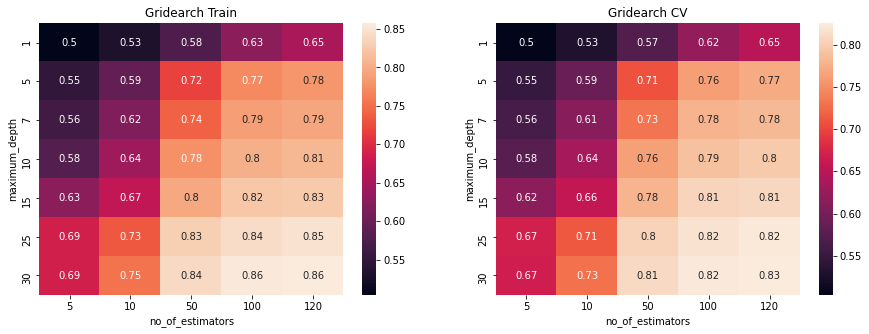

In [16]:
%%time
clf = RandomForestClassifier(n_jobs= -1,class_weight='balanced')
no_of_estimators = [5, 10, 50, 100, 120]
maximumdepth = [1, 5, 7, 10, 15, 25, 30]
parameters = {'n_estimators': no_of_estimators ,'max_depth':maximumdepth}
model = GridSearchCV(estimator=clf, param_grid=parameters, cv=3, n_jobs=-1, scoring='roc_auc',return_train_score=True)
model.fit(X_train_tfidf,y_train)
print("Model with best parameters :\n",model.best_params_)
train_auc = model.cv_results_['mean_train_score'].reshape(7,5)
cv_auc = model.cv_results_['mean_test_score'].reshape(7,5)

f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
  title = train_auc if i == 0 else cv_auc
  sns.heatmap(title,xticklabels=no_of_estimators,yticklabels=maximumdepth,annot=True,ax=axes[i])
  axes[i].set_title(f"Gridearch {'Train' if i==0 else 'CV'}")
  axes[i].set_xlabel("no_of_estimators")
  axes[i].set_ylabel("maximum_depth")


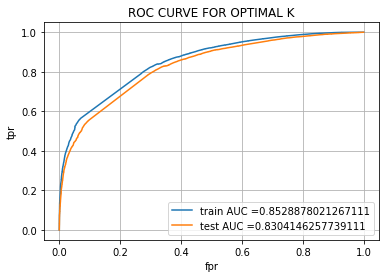

Area under train roc 0.8528878021267111
Area under test roc 0.8304146257739111


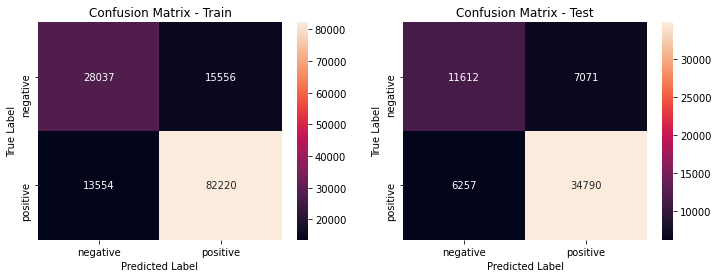


-----classification report on train data on TFIDF features -----

              precision    recall  f1-score   support

           0       0.67      0.64      0.66     43593
           1       0.84      0.86      0.85     95774

    accuracy                           0.79    139367
   macro avg       0.76      0.75      0.75    139367
weighted avg       0.79      0.79      0.79    139367


-----classification report on validation data on TFIDF features -----

              precision    recall  f1-score   support

           0       0.65      0.62      0.64     18683
           1       0.83      0.85      0.84     41047

    accuracy                           0.78     59730
   macro avg       0.74      0.73      0.74     59730
weighted avg       0.77      0.78      0.78     59730



In [17]:
best_est = RandomForestClassifier(**model.best_params_,class_weight='balanced')
best_est = best_est.fit(X_train_tfidf,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, best_est.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, best_est.predict_proba(X_test_tfidf)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))
plot_confusion_matrixes(best_est,X_train_tfidf,y_train,X_test_tfidf,y_test)


#classification report on train data
print('\n-----classification report on train data on TFIDF features -----\n')
print(classification_report(y_train, best_est.predict(X_train_tfidf)))

#classification report on validation data
print('\n-----classification report on validation data on TFIDF features -----\n')
print(classification_report(y_test, best_est.predict(X_test_tfidf)))

# **Feature importance**

Top 20 features are: 
            coef
rabi   0.027948
bravo  0.025628
ربي    0.017188
pas    0.014060
el     0.013177
bonne  0.013046
لا     0.012428
merci  0.010943
bech   0.010939
ne     0.010870
fi     0.009897
nul    0.009298
ممتاز  0.008050
الله   0.007837
ken    0.007745
bon    0.007738
jumia  0.007288
بينا   0.007071
mala   0.006690
الخير  0.006617


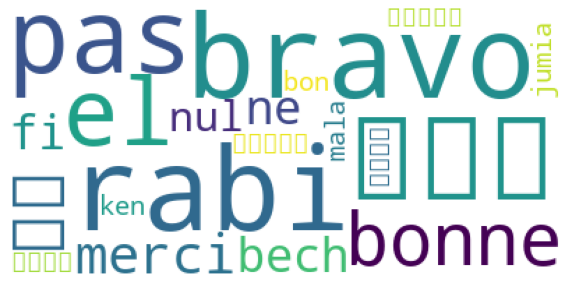

In [18]:
from wordcloud import WordCloud
dataf = best_est.feature_importances_
features = tfidf_features
dataf = pd.DataFrame(dataf,columns=['coef'],index=features)
top = dataf.sort_values(by='coef',ascending=False).head(20)
print('Top 20 features are: \n {}'.format(top))
top['words'] = top.index
top.reset_index(drop=True)
sent = top.words.str.cat(sep=' ')
#word cloud representation
wordcloud = WordCloud(background_color='white').generate(sent)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Random Forest On AvgWord2Vec

Model with best parameters :
 {'max_depth': 30, 'n_estimators': 120}
CPU times: user 4min 10s, sys: 2.14 s, total: 4min 12s
Wall time: 44min 33s


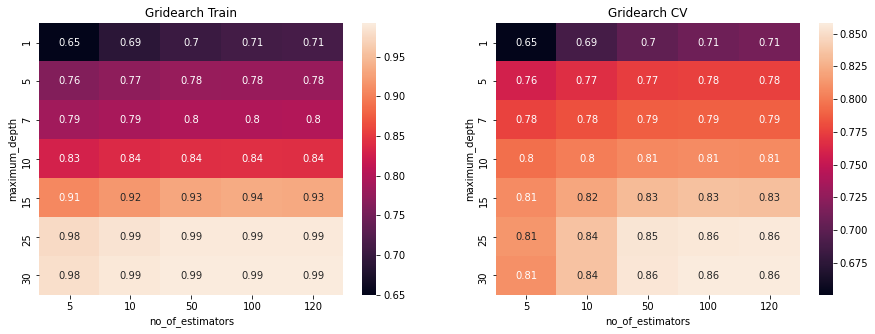

In [19]:
%%time 
clf = RandomForestClassifier(n_jobs= -1,class_weight='balanced')
no_of_estimators = [5, 10, 50, 100, 120]
maximumdepth = [1, 5, 7, 10, 15, 25, 30]
parameters = {'n_estimators': no_of_estimators ,'max_depth':maximumdepth}
model = GridSearchCV(estimator=clf, param_grid=parameters, cv=3, n_jobs=-1, scoring='roc_auc',return_train_score=True)
model.fit(X_train_avgw2v,y_train)
print("Model with best parameters :\n",model.best_params_)
train_auc = model.cv_results_['mean_train_score'].reshape(7,5)
cv_auc = model.cv_results_['mean_test_score'].reshape(7,5)

f, axes = plt.subplots(1, 2,figsize=(15,5))

for i in range(2):
  title = train_auc if i == 0 else cv_auc
  sns.heatmap(title,xticklabels=no_of_estimators,yticklabels=maximumdepth,annot=True,ax=axes[i])
  axes[i].set_title(f"Gridearch {'Train' if i==0 else 'CV'}")
  axes[i].set_xlabel("no_of_estimators")
  axes[i].set_ylabel("maximum_depth")

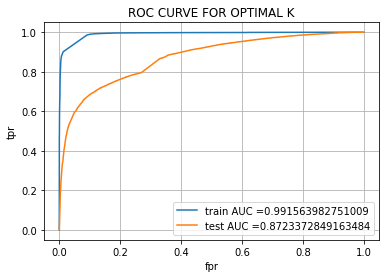

Area under train roc 0.991563982751009
Area under test roc 0.8723372849163484


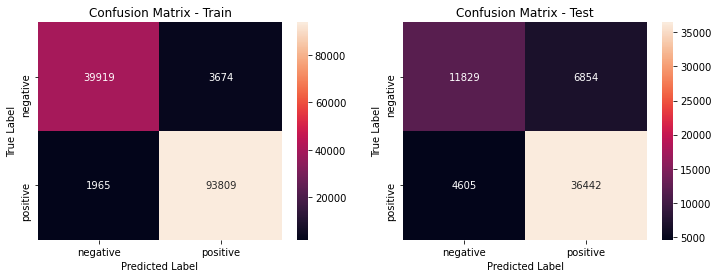


-----classification report on train data on AVG WORD2VEC features -----

              precision    recall  f1-score   support

           0       0.95      0.92      0.93     43593
           1       0.96      0.98      0.97     95774

    accuracy                           0.96    139367
   macro avg       0.96      0.95      0.95    139367
weighted avg       0.96      0.96      0.96    139367


-----classification report on validation data on AVG WORD2VEC features -----

              precision    recall  f1-score   support

           0       0.72      0.63      0.67     18683
           1       0.84      0.89      0.86     41047

    accuracy                           0.81     59730
   macro avg       0.78      0.76      0.77     59730
weighted avg       0.80      0.81      0.80     59730



In [20]:
best_est = RandomForestClassifier(**model.best_params_,class_weight='balanced')
best_est = best_est.fit(X_train_avgw2v,y_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, best_est.predict_proba(X_train_avgw2v)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, best_est.predict_proba(X_test_avgw2v)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))
plot_confusion_matrixes(best_est,X_train_avgw2v,y_train,X_test_avgw2v,y_test)

#classification report on train data
print('\n-----classification report on train data on AVG WORD2VEC features -----\n')
print(classification_report(y_train, best_est.predict(X_train_avgw2v)))

#classification report on validation data
print('\n-----classification report on validation data on AVG WORD2VEC features -----\n')
print(classification_report(y_test, best_est.predict(X_test_avgw2v)))

# **Observations and Conclusions**

In [1]:
from prettytable import PrettyTable
    
z = PrettyTable()

z.field_names = ["Vector","Algorithm","Hyperparam-n_estimator","Hyperparam-max_Depth","Train AUC","Test AUC","Train accuracy", "Test accuracy"]
z.add_row(["bow","random forest",120,30,0.8442616728885198,0.8266136030388367,0.79,0.77])
z.add_row(["tfidf","random forest",120,30,0.8528878021267111,0.8304146257739111,0.79,0.78])
z.add_row(["avgw2v","random forest",120,30,0.991563982751009,0.8723372849163484,0.96,0.81])
#z.add_row(["tfidfw2v","random forest",120,30,0.9999870561042803,0.8766026923217098])
print(z)

+--------+---------------+------------------------+----------------------+--------------------+--------------------+----------------+---------------+
| Vector |   Algorithm   | Hyperparam-n_estimator | Hyperparam-max_Depth |     Train AUC      |      Test AUC      | Train accuracy | Test accuracy |
+--------+---------------+------------------------+----------------------+--------------------+--------------------+----------------+---------------+
|  bow   | random forest |          120           |          30          | 0.8442616728885198 | 0.8266136030388367 |      0.79      |      0.77     |
| tfidf  | random forest |          120           |          30          | 0.8528878021267111 | 0.8304146257739111 |      0.79      |      0.78     |
| avgw2v | random forest |          120           |          30          | 0.991563982751009  | 0.8723372849163484 |      0.96      |      0.81     |
+--------+---------------+------------------------+----------------------+--------------------+-----

* Performance of Random forest with avgw2v are better compared to Decision tree models.